# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\Lailah\\vscode-project\\DA 1 Assessment\\medical_insurance_data_analysis\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\Lailah\\vscode-project\\DA 1 Assessment\\medical_insurance_data_analysis'

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio

In [12]:
df=pd.read_csv('./Data/Clean_Data/cleaned_data.csv')
df.head(8)

,age,sex,bmi,weight_category,children,smoker,region,charges,sex_male,smoker_yes,region_encoded
0,19.0,female,3.328627,Overweight,0.0,yes,southwest,9.734176,0.0,1.0,3.0
1,18.0,male,3.519573,Obese,1.0,no,southeast,7.453302,1.0,0.0,2.0
2,28.0,male,3.496508,Obese,3.0,no,southeast,8.400538,1.0,0.0,2.0
3,33.0,male,3.122585,Healthy,0.0,no,northwest,9.998092,1.0,0.0,1.0
4,32.0,male,3.363149,Overweight,0.0,no,northwest,8.260197,1.0,0.0,1.0
5,31.0,female,3.248046,Overweight,0.0,no,southeast,8.231275,0.0,0.0,2.0
6,46.0,female,3.509753,Obese,1.0,no,southeast,9.016827,0.0,0.0,2.0
7,37.0,female,3.322875,Overweight,3.0,no,northwest,8.893093,0.0,0.0,1.0


# Data Visualisation #

**Univariate Analysis with Categorical Data**
* Looking at how the categorical data ('Children', 'Smoker', 'Sex') influence insurance charges

Eventhough two variables are being compared, since all variables are being compared agaisnt charges and this is what is being investigated this section has been labelled as univariate analysis for simplicity.

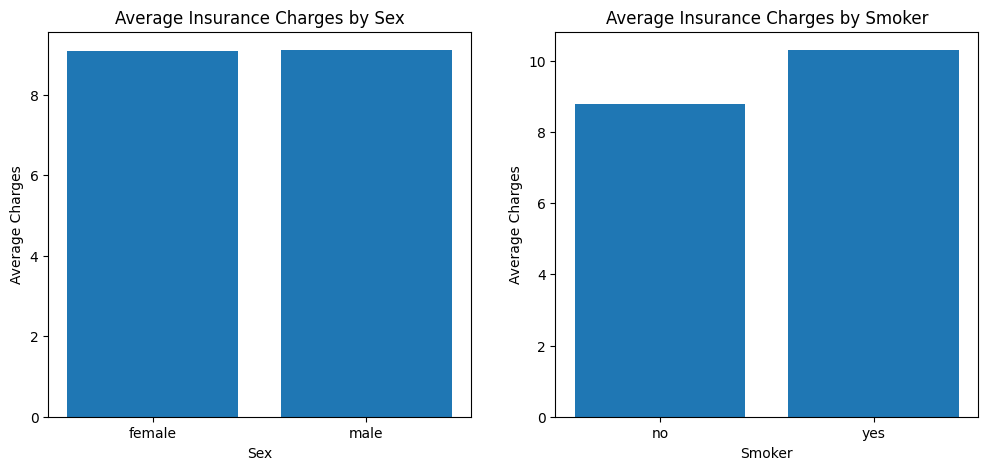

In [27]:
sex_charges = df.groupby('sex')['charges'].mean()
smoker_charges = df.groupby('smoker')['charges'].mean()
fig,axes=plt.subplots(1, 2, figsize=(12,5))
axes[0].bar(x=sex_charges.index, height=sex_charges)
axes[0].set_xlabel('Sex')
axes[0].set_ylabel('Average Charges')
axes[0].set_title('Average Insurance Charges by Sex')

axes[1].bar(x=smoker_charges.index, height=smoker_charges)
axes[1].set_xlabel('Smoker')
axes[1].set_ylabel('Average Charges')
axes[1].set_title('Average Insurance Charges by Smoker')

plt.show()

Text(0.5, 1.0, 'Average Insurance Charges by Number of Children')

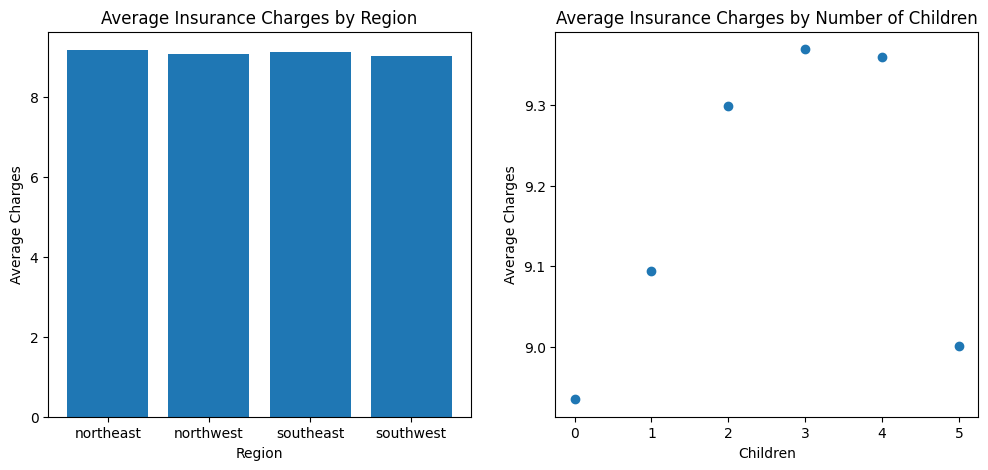

In [32]:
region_charges = df.groupby('region')['charges'].mean()
fig,axes=plt.subplots(1, 2, figsize=(12,5))
axes[0].bar(x=region_charges.index, height=region_charges)
axes[0].set_xlabel('Region')
axes[0].set_ylabel('Average Charges')
axes[0].set_title('Average Insurance Charges by Region')

axes[1].scatter(x=children_charges.index, y=children_charges)
axes[1].set_xlabel('Children')
axes[1].set_ylabel('Average Charges')
axes[1].set_title('Average Insurance Charges by Number of Children')

The data shows smokers pay more, on average, than non-smokers which backs up the hypothesis. 
Although men and women incur similar average insurance charges overall, I will investigate how gender interacts with other variables to influence costs.